In [1]:
import sklearn
import sys
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

print("sklearn version", sklearn.__version__)
print("python version", sys.version)

sklearn version 1.0.2
python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [2]:
digit = datasets.load_digits()

x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6)

In [3]:
#Duration of optimizing hyper parameter
start = time.time()
mlp=MLPClassifier(learning_rate_init = 0.001, batch_size=32, max_iter=50, solver='sgd')
prange = range(20, 81, 10)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name="hidden_layer_sizes", param_range=prange, cv=5, scoring="accuracy", n_jobs=4)
end=time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은 ", end-start, "초 입니다.")

하이퍼 매개변수 최적화에 걸린 시간은  23.72511124610901 초 입니다.


In [4]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

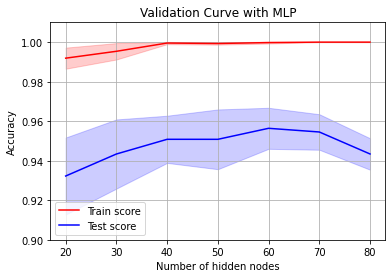


최적의 은닉층의 노드 개수는  60 개 입니다.



In [5]:
plt.plot(prange, train_mean, label="Train score", color="r")
plt.plot(prange, test_mean, label="Test score", color="b")
plt.fill_between(prange, train_mean-train_std, train_mean+train_std, alpha=0.2, color="r")
plt.fill_between(prange, test_mean-test_std, test_mean+test_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes");
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

#optimum number of hidden layer nodes
best_number_nodes = prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는 ", best_number_nodes, "개 입니다.\n")

In [6]:
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
mlp_test.fit(x_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=60, max_iter=300, solver='sgd')

In [7]:
res=mlp_test.predict(x_test)

In [8]:
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)

[[79.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. 65.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 76.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. 70.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. 72.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  2.  0. 65.  0.  0.  1.  2.]
 [ 0.  0.  0.  0.  0.  0. 73.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0. 67.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 60.  3.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0. 73.]]


In [9]:
no_correct = 0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "% 입니다.") #accuracy

테스트 집합에 대한 정확률은  97.35744089012516 % 입니다.


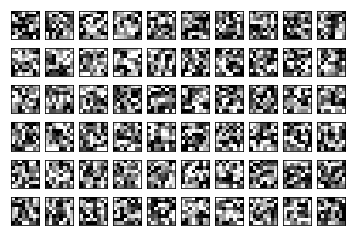

In [10]:
row = int(best_number_nodes/10)
col = 10
fig, axes = plt.subplots(row, col)

vmin, vmax = mlp_test.coefs_[0].min(), mlp_test.coefs_[0].max()
for coef, ax in zip(mlp_test.coefs_[0].T, axes.ravel()):
  ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=0.5*vmin, vmax=0.5*vmax)
  ax.set_xticks(())
  ax.set_yticks(())

plt.show()